In [1]:
# loading the libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#Load the dataset
gapdata= pd.read_csv("gap.csv", low_memory=False)
data_clean=gapdata.dropna()

In [3]:
# Data pre-processing tasks
data_clean['breastcancerper100th']= data_clean['breastcancerper100th'].convert_objects(convert_numeric=True)
data_clean['femaleemployrate']= data_clean['femaleemployrate'].convert_objects(convert_numeric=True)
data_clean['alcconsumption']= data_clean['alcconsumption'].convert_objects(convert_numeric=True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [4]:
#Create binary Breast Cancer Rate
def bin2cancer (row):
   if row['breastcancerper100th'] <= 20 :
      return 0
   elif row['breastcancerper100th'] > 20 :
      return 1

#Create binary Alcohol consumption
def bin2alcohol(row):
   if row['alcconsumption'] <= 5 :
      return 0
   elif row['alcconsumption'] > 5 :
      return 1
# create binary Female employee rate
def bin2femalemployee(row):
   if row['femaleemployrate'] <= 50 :
      return 0
   elif row['femaleemployrate'] > 50 :
      return 1
#Apply the new variables bin2alcohol,bin2femalemployee, bin2cancer to the gapmind dataset
data_clean['bin2femalemployee'] = data_clean.apply (lambda row: bin2femalemployee (row),axis=1)
data_clean['bin2alcohol'] = data_clean.apply (lambda row: bin2alcohol (row),axis=1)
data_clean['bin2cancer']=data_clean.apply(lambda row: bin2cancer(row),axis=1)

In [5]:
data_clean.dtypes

alcconsumption          int64
breastcancerper100th    int64
femaleemployrate        int64
bin2femalemployee       int64
bin2alcohol             int64
bin2cancer              int64
dtype: object

In [6]:
data_clean.describe()

,alcconsumption,breastcancerper100th,femaleemployrate,bin2femalemployee,bin2alcohol,bin2cancer
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,6.672727,37.521212,47.951515,0.424242,0.539394,0.751515
std,4.985545,23.038035,14.789089,0.495732,0.499963,0.433450
min,0.000000,4.000000,12.000000,0.000000,0.000000,0.000000
25%,3.000000,21.000000,39.000000,0.000000,0.000000,1.000000
50%,6.000000,30.000000,48.000000,0.000000,1.000000,1.000000
75%,10.000000,50.000000,56.000000,1.000000,1.000000,1.000000
max,23.000000,101.000000,83.000000,1.000000,1.000000,1.000000


In [7]:
# Assign predictor and traget variable
predictors=data_clean[['bin2alcohol','bin2femalemployee']]
target=data_clean.bin2cancer

In [8]:
#Split into training and testing sets
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,target,test_size=0.4)

In [9]:
pred_train.shape

(99, 2)

In [33]:
#tar_test.head

In [10]:
pred_test.shape

(66, 2)

In [11]:
tar_train.shape

(99L,)

In [12]:
tar_test.shape

(66L,)

In [24]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

In [25]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[ 8,  7],
       [ 4, 47]])

In [26]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.83333333333333337

In [27]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.49408698  0.50591302]


In [28]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

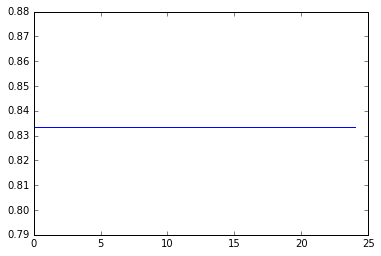

In [29]:
%matplotlib inline
plt.cla()
plt.plot(trees, accuracy)